In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df = df.replace({"Yes": 1, "No": 0})

/var/folders/j4/812r9j5n3jq73qnzmqwqp5pc0000gn/T/ipykernel_2964/821598539.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": 1, "No": 0})


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


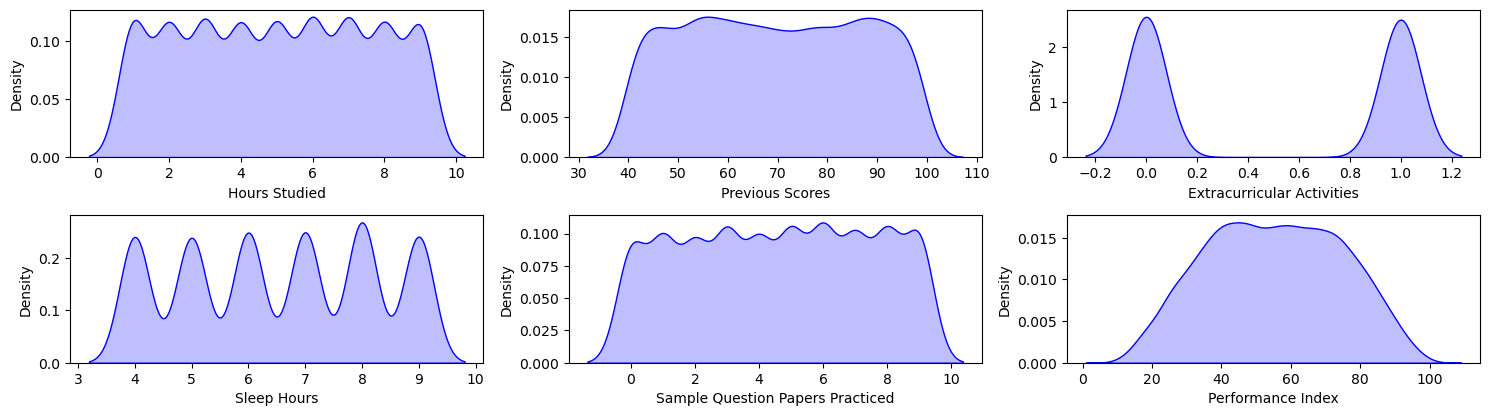

In [17]:
plt.figure(figsize=(15,10))

for i in range (0 , len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[df.columns[i]],color="b",fill=True)
    plt.xlabel(df.columns[i])
    plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

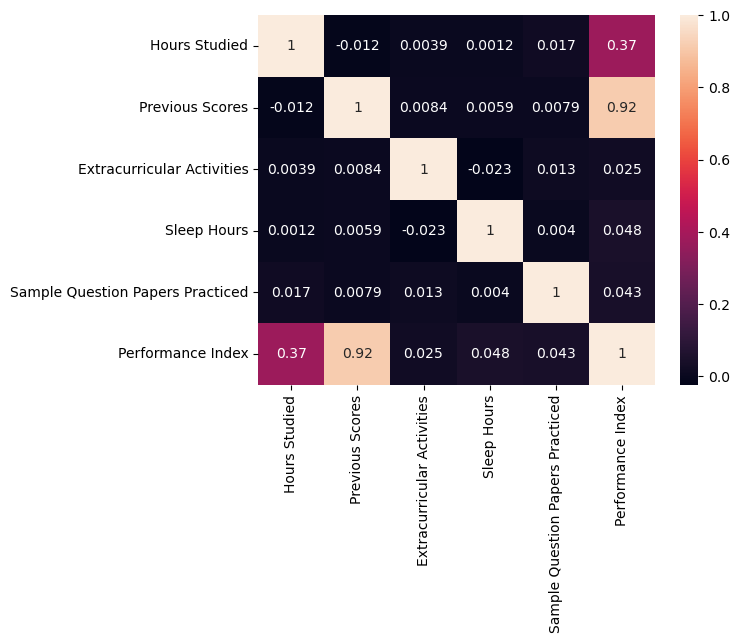

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

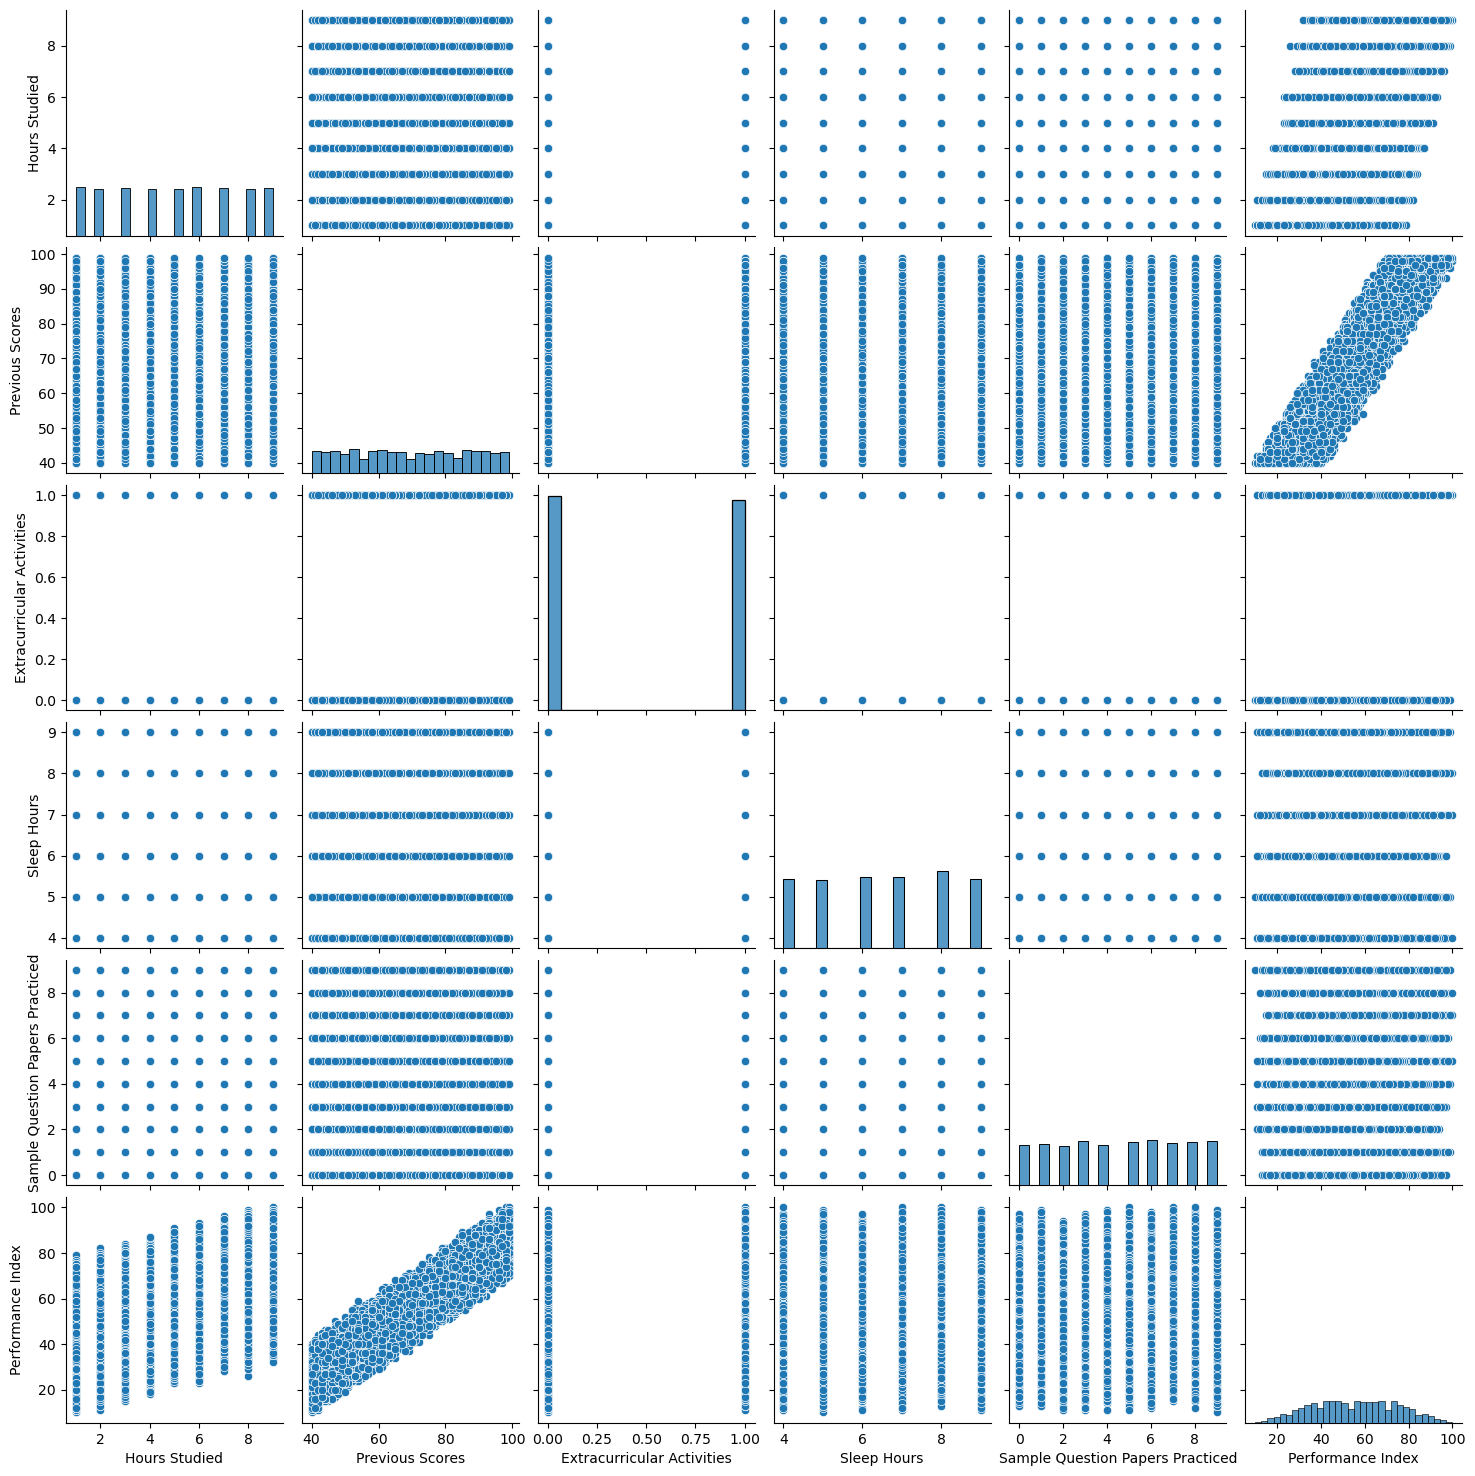

In [22]:
sns.pairplot(df)
plt.show()

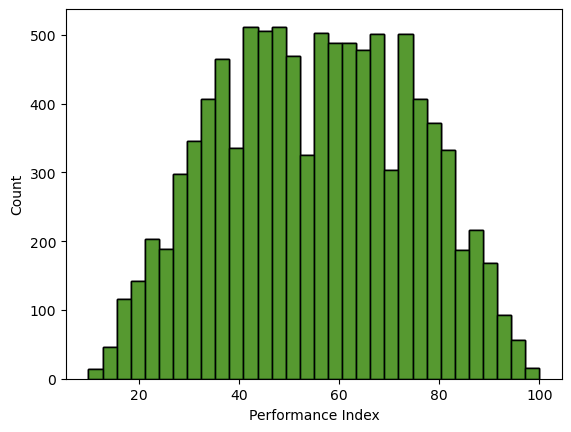

In [25]:
sns.histplot(df["Performance Index"])
plt.show()

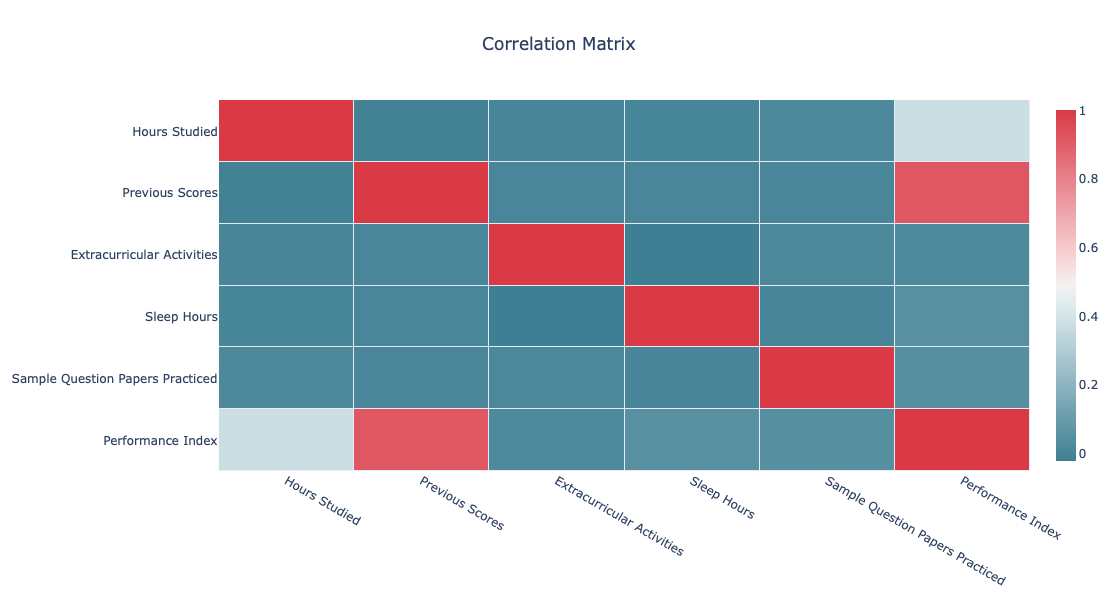

In [28]:
import plotly.graph_objects as go
corr = df.corr()
X = [i for i in df.columns]
colorscale = [[0.0, '#3f7f93'],  [0.071, '#5890a1'], [0.143, '#72a1b0'], [0.214, '#8cb3bf'], [0.286, '#a7c5cf'], [0.357, '#c0d6dd'],
                  [0.429, '#dae8ec'], [0.5, '#f2f2f2'], [0.571, '#f7d7d9'], [0.643, '#f2bcc0'], [0.714, '#eda3a9'], [0.786, '#e8888f'],
                    [0.857, '#e36e76'], [0.929, '#de535e'], [1.0, '#d93a46']]

heat = go.Heatmap(z=corr, x=X, y=X, xgap=1, ygap=1, colorscale=colorscale, colorbar_thickness=20, colorbar_ticklen=3,)
layout = go.Layout(title_text='Correlation Matrix', title_x=0.5,  width=600, height=600,  xaxis_showgrid=False, yaxis_showgrid=False,yaxis_autorange='reversed')
fig = go.Figure(data=[heat], layout=layout)        
fig.show()

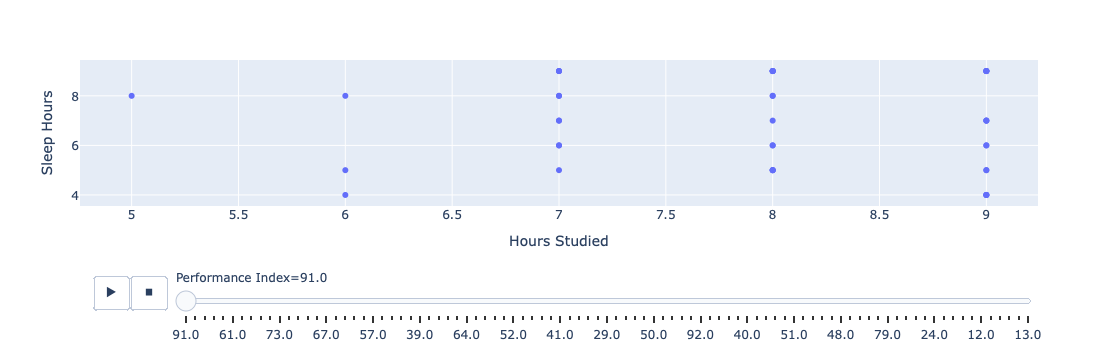

In [48]:
import plotly.express as px
px.scatter(df, x="Hours Studied", y="Sleep Hours",animation_frame="Performance Index")

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [31]:
X=df[["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced"]]
y=df["Performance Index"]

In [32]:
df.shape

(10000, 6)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=15)

In [34]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
regression=LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred=regression.predict(X_test)

In [38]:
y_pred

array([47.91236435, 43.88889373, 79.56899977, ..., 26.85420112,
       90.1758095 , 70.42266186])

In [40]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("rmse:",rmse)
print("R square score:",score)

mae: 1.6283231147087038
mse: 4.218480188886638
rmse: 2.0538939088683814
R square score: 0.988715492544055


In [41]:
#adjusted r2 score 

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9886871963869438

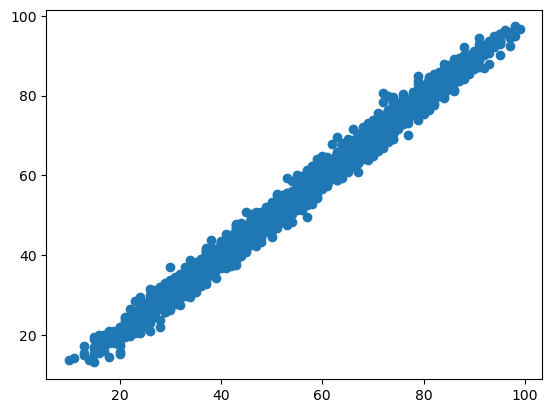

In [42]:
plt.scatter(y_test,y_pred)
plt.show()

In [43]:
regression.coef_

array([ 7.38270904, 17.6312232 ,  0.29357719,  0.82041391,  0.55608923])

In [44]:
regression.intercept_

np.float64(55.18825)

In [45]:
!pip install lazypredict

In [46]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [47]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 5
[LightGBM] [Info] Start training from score 55.188250
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SGDRegressor                                 0.99       0.99  2.05        0.01
HuberRegressor                               0.99       0.99  2.05        0.02
LassoLarsCV                                  0.99       0.99  2.05        0.01
Lars                                         0.99       0.99  2.05        0.01
LassoLarsIC                                  0.99       0.99  2.05        0.00
LinearRegression                            